In [1]:

import numpy as np
from matplotlib import pyplot as plt
class Quadrotor1D(object):
    """The simulation environment for Quadroto1D with a stabilizing controller."""
    def __init__(self, m = 0.1,K_stab = np.array([[2/3,1]]),l = 1,w_max = 0.3,dt=0.1,space_dim=1,x_0=None):

        self.m  = m # Mass
        self.K_stab = K_stab # Universal stabilizer(stiffness of the spring)
        self.l = l # Velocity drag

        self.w_max = w_max # Maximum disturbance force

        self.dt = dt # Sampling time interval

        self.space_dim = space_dim # Spatial dimension
        
        O = np.zeros((space_dim,space_dim))

        I = np.eye(space_dim)

        self.A = np.vstack([np.hstack([O,I]),
                      np.hstack([O,-l/m * I])])*self.dt+np.eye(space_dim*2)

        self.B = np.vstack([0,
                      1/m ])*self.dt
        
        self.AK = self.A-self.B.dot(K_stab)

        if x_0 is None:
            p_0 = np.zeros(space_dim)
            v_0 = np.zeros(space_dim)

            self.x_0 = np.vstack([p_0,v_0])
        else:
            self.x_0 = x_0

        self.x = np.array(self.x_0)
        
        self.w_change_period = 1 # The expected time steps till the next change of w.

        self.N_steps = 0

    def reset(self):
        self.x = np.array(self.x_0)
    
    def step(self,F):
        
        if self.N_steps % self.w_change_period==0: # Determine whether w will change in this step.
            self.w = self.w_max * np.random.choice([1,-1])# Change w to be the adversarial noise + random noise.
                
        
        w_vec = np.zeros(self.x.shape)

        w_vec[-1,-1] = self.w
        # print(self.w)
        self.x = self.AK.dot(self.x)+self.B.dot(F) + w_vec 

        # Reset w to 0
        self.w=0
        self.N_steps+=1

    def state(self):
        return np.array(self.x)

In [2]:
m = 1
K_stab = np.array([[2/3,1]])

# K_stab = np.array([[0,0]])
l = 0.25
dt = 1
w_max = 0.2
env=Quadrotor1D(m,K_stab,l,w_max,dt)

In [3]:
u_hist = []
x_hist = []
w_hist = []

timesteps = 400

for _ in range(timesteps):
    x_hist.append(env.state())
    u = 0
    env.step(u)
    u_hist.append(u)
    w_hist.append(env.state()-env.AK.dot(x_hist[-1])-env.B.dot(u_hist[-1]))

In [4]:
x_hist = np.array(x_hist)
w_hist = np.array(w_hist)

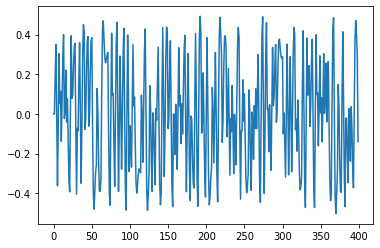

In [5]:
plt.plot(x_hist[:,0])

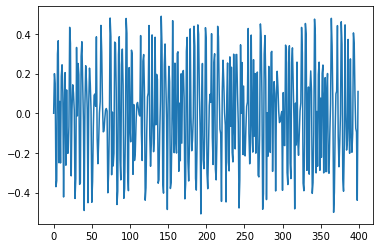

In [6]:
plt.plot(x_hist[:,1])

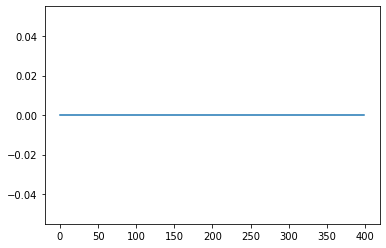

In [7]:
plt.plot(u_hist)

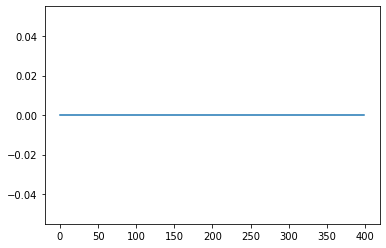

In [8]:
plt.plot(w_hist[:,0])

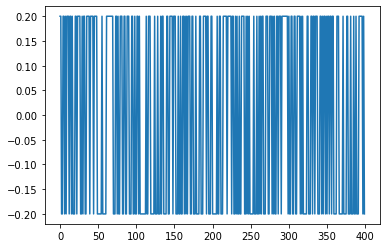

In [9]:
plt.plot(w_hist[:,1])